First we import all the necessary libraries and models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Uploading our Dataset

In [2]:
from google.colab import files
uploaded=files.upload()

Saving wine_data.csv to wine_data.csv


In [16]:
df=pd.read_csv('wine_data.csv')

Exploratory Data Analysis


Q1: Quality Column Analysis 
  Most Frequent Quality: 5
  Highest Quality Score: 8
  Lowest Quality Score:  3


/tmp/ipython-input-2646653353.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


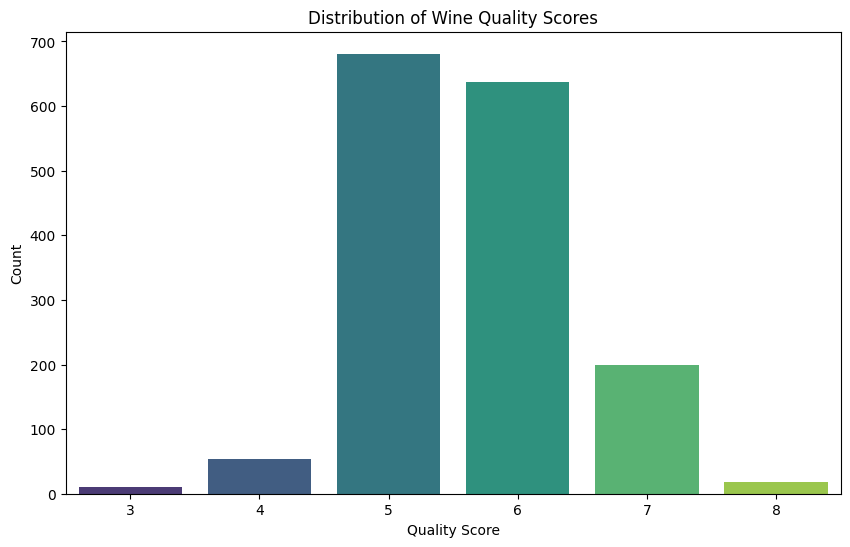


Q2, Q3, Q4, Q6: Correlation with Quality
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


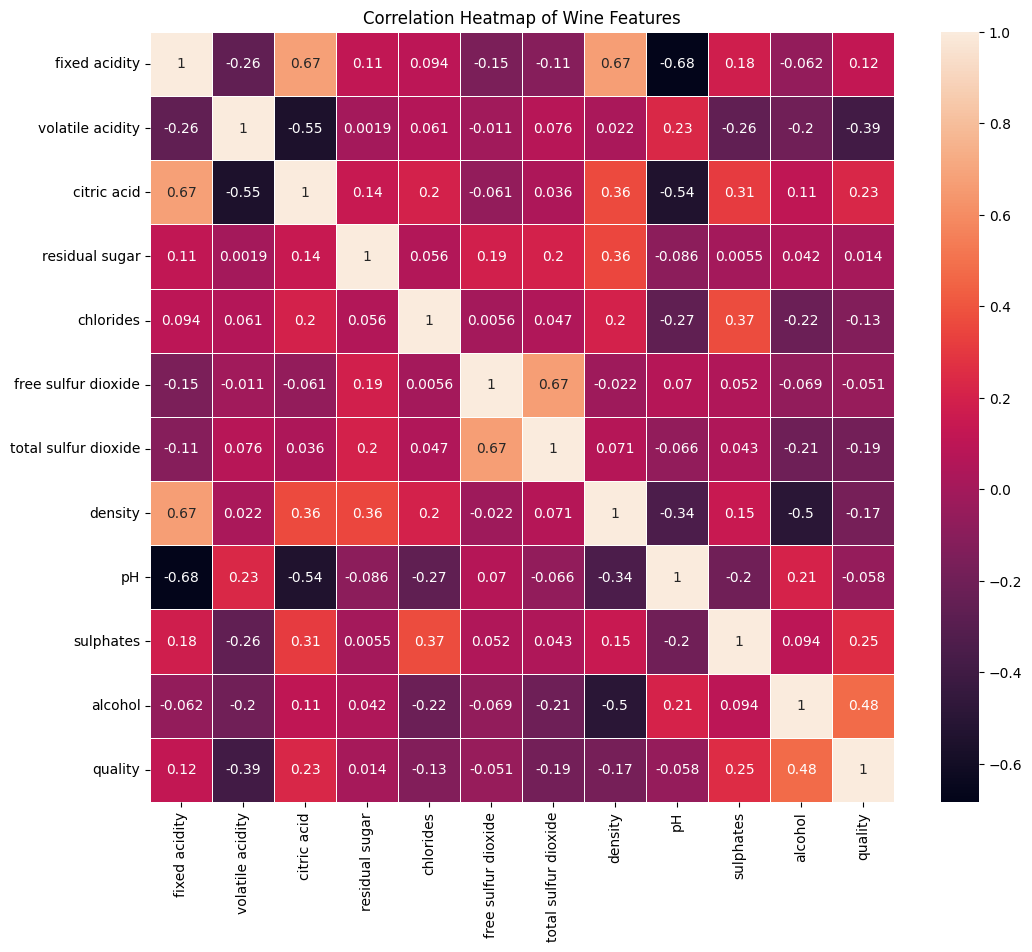


Correlation Insights
Alcohol vs. Quality: 0.48. This is a moderate positive correlation. 
Volatile Acidity vs. Quality: -0.39. This is a moderate negative correlation. 
Fixed Acidity vs. Quality: 0.12. This is a weak positive correlation. 
Free Sulfur Dioxide vs. Quality: -0.05. This is a very weak negative correlation. 

Q5: Average Residual Sugar Analysis 
  Avg. Residual Sugar (Lowest Quality - 3): 2.6350 g/L
  Avg. Residual Sugar (Highest Quality - 8): 2.5778 g/L


In [20]:
# Q1: What is the most frequently occurring wine quality? What is the highest and lowest?
most_frequent_quality = df['quality'].mode()[0]
highest_quality = df['quality'].max()
lowest_quality = df['quality'].min()

print(f"\nQ1: Quality Column Analysis ")
print(f"  Most Frequent Quality: {most_frequent_quality}")
print(f"  Highest Quality Score: {highest_quality}")
print(f"  Lowest Quality Score:  {lowest_quality}")

# Plot the distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# Q2, Q3, Q4, Q6: Correlation Analysis
print("\nQ2, Q3, Q4, Q6: Correlation with Quality")
correlation_matrix = df.corr()
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_correlation)

# Plot a heatmap of the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.savefig('Exploratory Data Analysis')
plt.show()

print("\nCorrelation Insights")
print(f"Alcohol vs. Quality: {quality_correlation['alcohol']:.2f}. This is a moderate positive correlation. ")
print(f"Volatile Acidity vs. Quality: {quality_correlation['volatile acidity']:.2f}. This is a moderate negative correlation. ")
print(f"Fixed Acidity vs. Quality: {quality_correlation['fixed acidity']:.2f}. This is a weak positive correlation. ")
print(f"Free Sulfur Dioxide vs. Quality: {quality_correlation['free sulfur dioxide']:.2f}. This is a very weak negative correlation. ")

# Q5: Average residual sugar for best and lowest quality wine
avg_sugar_best = df[df['quality'] == highest_quality]['residual sugar'].mean()
avg_sugar_lowest = df[df['quality'] == lowest_quality]['residual sugar'].mean()

print(f"\nQ5: Average Residual Sugar Analysis ")
print(f"  Avg. Residual Sugar (Lowest Quality - {lowest_quality}): {avg_sugar_lowest:.4f} g/L")
print(f"  Avg. Residual Sugar (Highest Quality - {highest_quality}): {avg_sugar_best:.4f} g/L")

Visualising Key relationships

/tmp/ipython-input-2629003644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='quality', y='alcohol', data=df, palette='summer')
/tmp/ipython-input-2629003644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='quality', y='volatile acidity', data=df, palette='autumn')


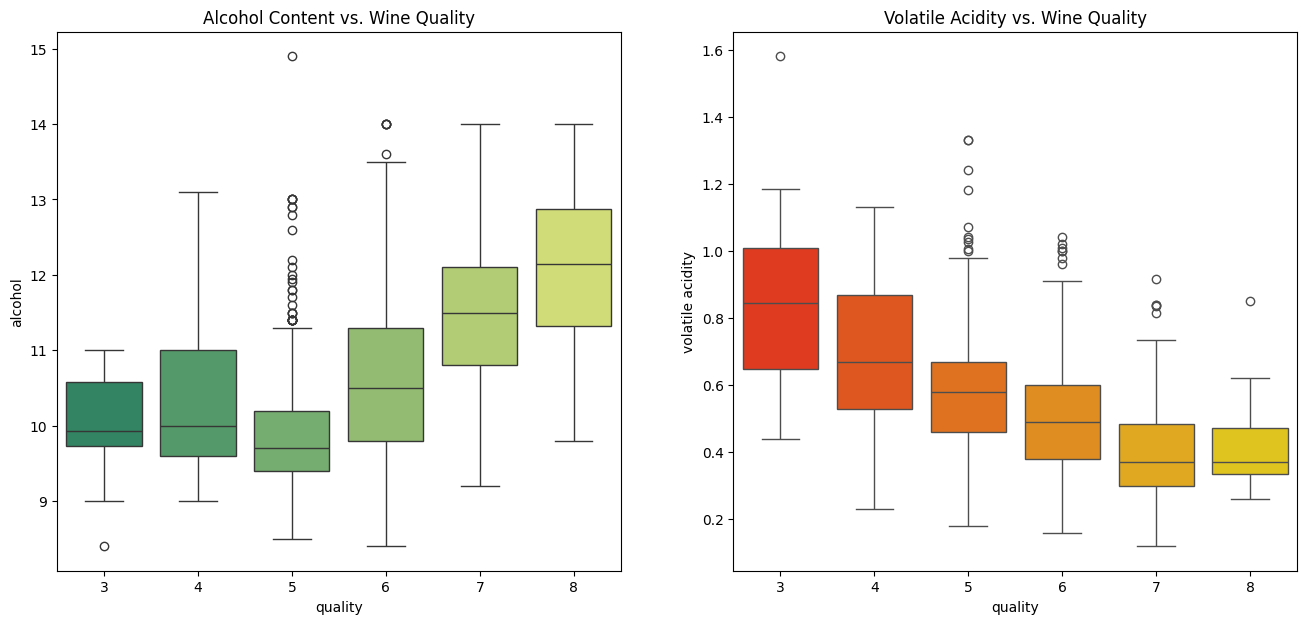

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Alcohol (Positive Correlation)
sns.boxplot(ax=axes[0], x='quality', y='alcohol', data=df, palette='summer')
axes[0].set_title('Alcohol Content vs. Wine Quality')

# Volatile Acidity (Negative Correlation)
sns.boxplot(ax=axes[1], x='quality', y='volatile acidity', data=df, palette='autumn')
axes[1].set_title('Volatile Acidity vs. Wine Quality')
plt.savefig('Key Relationships')

plt.show()

Check if our dataset has any missing values

In [4]:
has_missing = df.isnull().values.any()
print(has_missing)

False


Hence we don't need to take care of any missing values. Now we define the Features (X) and the Target Variable (Y).

In [5]:
X = df.drop('quality', axis=1)
Y = df['quality']

Now split the data into training and testing set

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Model-1: Decision Tree Classifier

In [10]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
dt_preds = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(Y_test, dt_preds)
print("Decision Tree Model")
print(f"Accuracy: {dt_accuracy:.4f}")

# Show a detailed classification report
print("\nClassification Report (Decision Tree):")
print(classification_report(Y_test, dt_preds, zero_division=0))

Decision Tree Model
Accuracy: 0.5825

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.08      0.07        13
           5       0.67      0.69      0.68       164
           6       0.62      0.54      0.58       169
           7       0.44      0.58      0.50        48
           8       0.00      0.00      0.00         5

    accuracy                           0.58       400
   macro avg       0.30      0.31      0.31       400
weighted avg       0.59      0.58      0.59       400



Model-2: Random forest CLassifier

In [12]:
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(Y_test, rf_preds)
print("Random Forest Model")
print(f"Accuracy: {rf_accuracy:.4f}")

# Show a detailed classification report
print("\nClassification Report (Random Forest):")
print(classification_report(Y_test, rf_preds, zero_division=0))

Random Forest Model
Accuracy: 0.6325

Classification Report (Random Forest):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.69      0.74      0.71       164
           6       0.60      0.64      0.62       169
           7       0.55      0.48      0.51        48
           8       0.00      0.00      0.00         5

    accuracy                           0.63       400
   macro avg       0.31      0.31      0.31       400
weighted avg       0.60      0.63      0.62       400



Model Comparison

Decision Tree


/tmp/ipython-input-3490130934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='rocket')


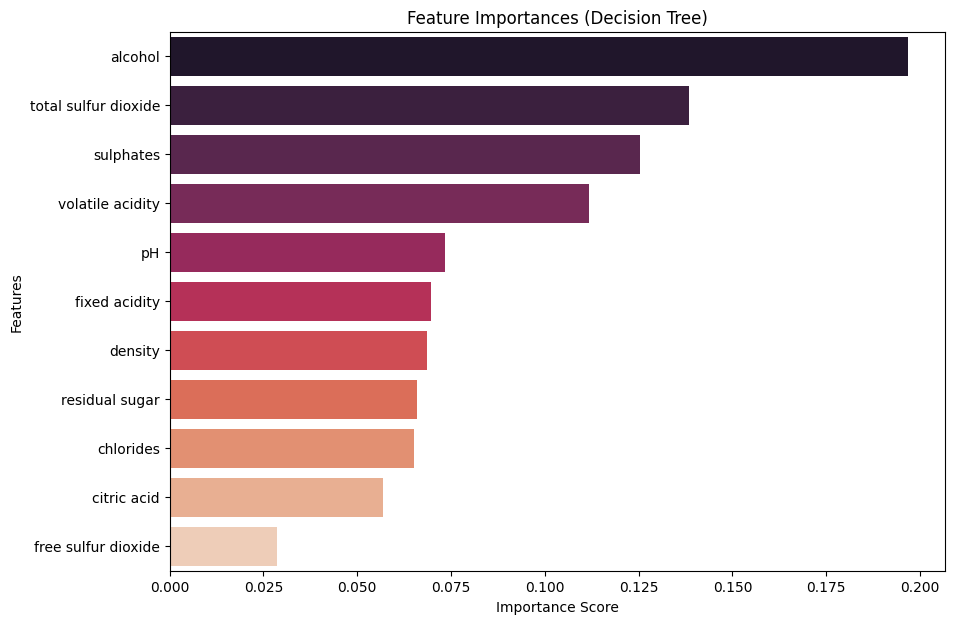


Random Forest


/tmp/ipython-input-3490130934.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='rocket')


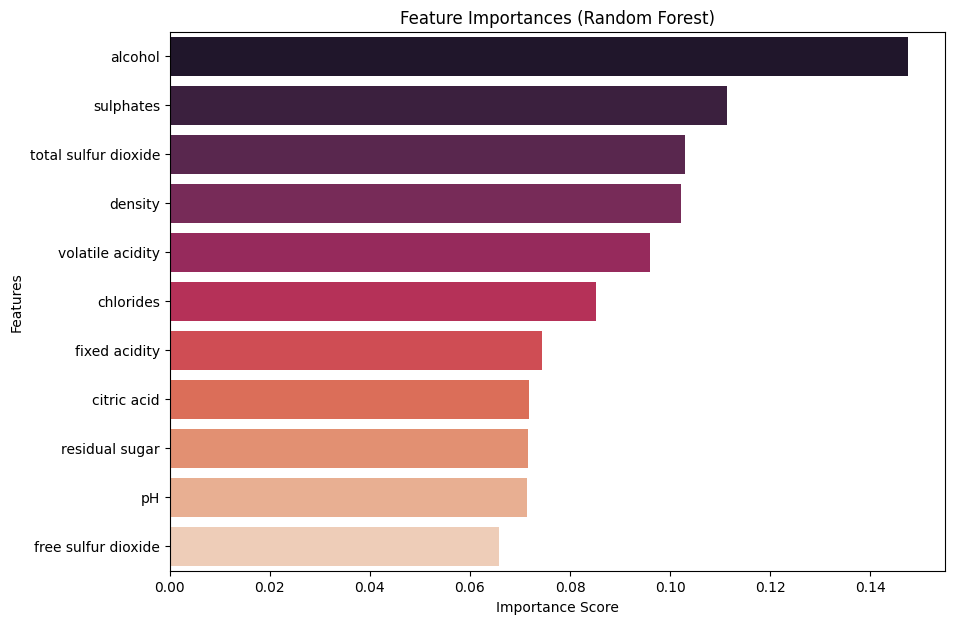

In [15]:
#Plot feature importances from the Decision Tree
print('Decision Tree')
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='rocket')
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.savefig("Decision Tree Feature Importances")
plt.show()

print("\nRandom Forest")
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='rocket')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.savefig("Random Forest Feature Importances")
plt.show()